In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
#Hidden layer #3 perceptrons
model.add(Dense(11,activation='sigmoid',input_dim=11)) 
#  Hidden layer with 11 nodes connected to input layer having 11 columns
model.add(Dense(11,activation='sigmoid'))#  Hidden layer with 11 nodes
model.add(Dense(1,activation='sigmoid'))#  Hidden layer with 1 node

2022-12-21 09:21:44.881053: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

2022-12-21 09:21:45.042521: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5725 - accuracy: 0.7789 - val_loss: 0.5109 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7958 - val_loss: 0.5028 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7958 - val_loss: 0.5017 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7958 - val_loss: 0.5008 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7958 - val_loss: 0.4998 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7958 - val_loss: 0.4989 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.7958 - val_loss: 0.4982 - val_accuracy: 0.7969

In [17]:
model.layers[0].get_weights() #Weights of input layer

[array([[-0.3912704 ,  0.18139094, -0.02780148, -0.37122244,  0.09974334,
         -0.28883907, -0.28190982,  0.2962095 , -0.338199  , -0.33620065,
          0.35406336],
        [ 0.22687916, -0.5127401 ,  0.1334852 ,  0.16259766,  0.38000536,
         -0.27594256, -0.4116576 , -0.2253528 ,  0.3141849 ,  0.3405516 ,
          0.13444257],
        [-0.43146554, -0.00802457, -0.20374411,  0.22442448,  0.27068454,
         -0.12237211, -0.3161645 ,  0.10748353,  0.22803584,  0.39132696,
         -0.13430183],
        [ 0.23102611,  0.14040112, -0.48355043, -0.3948069 , -0.23837289,
          0.4770769 ,  0.10872054, -0.03345527,  0.05209088,  0.23389882,
         -0.18108255],
        [-0.25839943,  0.0899291 , -0.25987697, -0.40039653, -0.19496404,
         -0.31581017,  0.34494993, -0.02849779,  0.3338281 ,  0.14743382,
          0.5535747 ],
        [ 0.41206828,  0.01046234, -0.51717496,  0.3421421 ,  0.12044836,
          0.36862817,  0.48404238, -0.01613887, -0.11133769,  0.2311698

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([[0.2445474 ],
       [0.24251848],
       [0.24251848],
       ...,
       [0.24251848],
       [0.2548412 ],
       [0.2445474 ]], dtype=float32)

In [20]:
y_pred = y_pred.argmax(axis=-1)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [22]:
history.history   #contains loss, accuracy, val loss, val accuracy for all epochs


{'loss': [0.5725074410438538,
  0.5078942775726318,
  0.5052021145820618,
  0.5042899250984192,
  0.5036370754241943,
  0.5030631422996521,
  0.5024992227554321,
  0.5018168091773987,
  0.5015158653259277,
  0.5010544657707214,
  0.5007069706916809,
  0.5005361437797546,
  0.5003920793533325,
  0.5002094507217407,
  0.5002468228340149,
  0.4999891519546509,
  0.5000466704368591,
  0.4999872148036957,
  0.4999229311943054,
  0.49986398220062256,
  0.4995451867580414,
  0.49969029426574707,
  0.49969249963760376,
  0.49955692887306213,
  0.4997147023677826,
  0.4995515048503876,
  0.4995249807834625,
  0.49945589900016785,
  0.4995024800300598,
  0.4992603659629822,
  0.4993647634983063,
  0.4993240237236023,
  0.4993390142917633,
  0.4992934763431549,
  0.4992852807044983,
  0.4990885257720947,
  0.4992738962173462,
  0.4990960359573364,
  0.49906936287879944,
  0.49893078207969666,
  0.4992046356201172,
  0.4993126690387726,
  0.49907925724983215,
  0.4990825951099396,
  0.499025732278

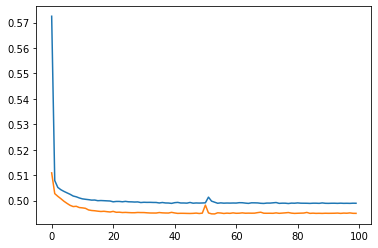

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

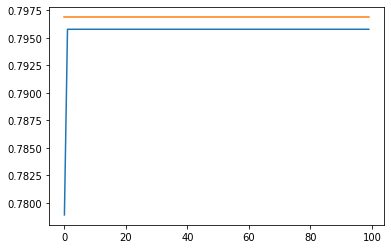

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])